# 安徽省政府工作报告文本分析

In [7]:
from urllib import request
import re
import jieba.posseg as pseg
import pandas as pd
import numpy as np

In [2]:
def get(url):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/130.0.0.0 Safari/537.36'}
    req = request.Request(url, headers=headers)
    res = request.urlopen(req)
    html = res.read().decode('utf-8')
    return html

In [9]:
url0 = 'https://www.ah.gov.cn/public/column/1681?type=4&catId=6708531&action=list'
html0 = get(url0)
p_link = r'''<a href="([^<]+)"[^s]class="title"'''
links = re.findall(p_link, html0)
seen = set()
unique_links = []
for link in links:
    if link not in seen:
        unique_links.append(link)
        seen.add(link)
links = unique_links
links

['https://www.ah.gov.cn/public/1681/565300671.html',
 'https://www.ah.gov.cn/public/1681/564207141.html',
 'https://www.ah.gov.cn/public/1681/554092201.html',
 'https://www.ah.gov.cn/public/1681/553953381.html',
 'https://www.ah.gov.cn/public/1681/8254221.html',
 'https://www.ah.gov.cn/public/1681/7965131.html',
 'https://www.ah.gov.cn/public/1681/7965141.html',
 'https://www.ah.gov.cn/public/1681/7965151.html',
 'https://www.ah.gov.cn/public/1681/7965161.html',
 'https://www.ah.gov.cn/public/1681/7965171.html',
 'https://www.ah.gov.cn/public/1681/7965181.html',
 'https://www.ah.gov.cn/public/1681/7965191.html',
 'https://www.ah.gov.cn/public/1681/7965201.html',
 'https://www.ah.gov.cn/public/1681/7965211.html',
 'https://www.ah.gov.cn/public/1681/7965221.html',
 'https://www.ah.gov.cn/public/1681/7965231.html',
 'https://www.ah.gov.cn/public/1681/7965241.html',
 'https://www.ah.gov.cn/public/1681/7965251.html']

In [18]:
for link in links:
    html = get(link)
    title = re.findall(r'colspan="3">([^<]+)</td>', html)[0]
    content_pattern = re.compile(r'data-setting="{pdf:false}">(.*?)<div[^s]class="clear"></div>', re.S)
    content = re.findall(content_pattern, html)
    with open('data/安徽省/' + title + '.txt', 'w', encoding='utf-8') as f:
        f.write(content[0])
    print(title)

2024年政府工作报告
2023年政府工作报告
2022年政府工作报告
2021年政府工作报告
2020年政府工作报告
2019年政府工作报告
2018年政府工作报告
2017年政府工作报告
2016年政府工作报告
2015年政府工作报告
2014年政府工作报告
2013年政府工作报告
2012年政府工作报告
2011年政府工作报告
2010年政府工作报告
2009年政府工作报告
2008年政府工作报告
2007年政府工作报告


In [2]:
def tokenize(text):
    words = pseg.lcut(text, HMM=True)
    with open('cn_stopwords.txt', 'r', encoding='utf-8') as f:
        stopwords = f.read().split('\n')
        stopwords.extend(['黑体', '楷体', '仿宋', '宋告', '日方', '小标', '安徽省', '安徽', '工作', '习近平']) # 视情况手动补充停用词
        filtered_words = [
            word.word for word in words
            if word.word not in stopwords
            and len(word.word) > 1
            and word.flag not in ['c', 'd', 'm', 'nr', 'ns', 'p', 'q', 'r', 'v', 't']
            ]
    return filtered_words

In [3]:
df = pd.DataFrame(columns=['year', 'tokens'])
for i in range(2007, 2025):
    with open('data/安徽省/' + str(i) + '年政府工作报告.txt', 'r', encoding='utf-8') as f:
        text = f.read()
        ctext = ''.join(re.findall(r'[\u4e00-\u9fff]+', text))
        words = tokenize(ctext)
        df.loc[df.shape[0] + 1] = {'year': i, 'tokens': ' '.join(words)}
df

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\zhang\AppData\Local\Temp\jieba.cache


Loading model cost 0.494 seconds.
Prefix dict has been built successfully.


,year,tokens
1,2007,人民代表大会 会议 省长 代表 代表 人民政府 大会 报告 省政协 委员 列席 人员 意见 ...
2,2008,人民代表大会 会议 人民政府 代理 省长 代表 代表 人民政府 大会 政府 报告 省政协 委...
3,2009,人民代表大会 会议 人民政府 省长 代表 代表 人民政府 大会 政府 报告 省政协 委员 列...
4,2010,人民代表大会 会议 人民政府 省长 代表 代表 人民政府 大会 政府 报告 省政协 委员 列...
5,2011,人民代表大会 会议 人民政府 省长 代表 代表 人民政府 大会 报告 政府 省政协 委员 列...
6,2012,人民代表大会 会议 人民政府 代理 省长 代表 代表 人民政府 大会 报告 政府 省政协 委...
7,2013,人民代表大会 会议 人民政府 省长 代表 代表 人民政府 大会 报告 政府 省政协 委员 列...
8,2014,人民代表大会 会议 人民政府 省长 代表 代表 人民政府 大会 报告 政府 省政协 委员 列...
9,2015,人民代表大会 会议 人民政府 省长 代表 代表 人民政府 大会 报告 政府 省政协 委员 列...
10,2016,人民代表大会 会议 人民政府 省长 代表 代表 人民政府 大会 报告 政府 省政协 委员 列...


In [5]:
digital_words = '数字经济、数据安全、智慧化、智能经济、数据服务、信息经济、互联网、云平台、智能制造、物联网、数字化、数字产业、信息技术、区块链、数字基础设施、大数据、数据治理、云计算、数字生活、智能化、人工智能、数据共享、机器人、工业互联网、数字技术'.split('、')
green_words = '生态、污染、生态环境、节能、新能源、绿化、环境保护、环保、绿色、可持续发展、排放、环境治理'.split('、')

In [8]:
df_new = pd.DataFrame(columns=['year', 'green', 'digital'])
for i in df.index:
    words = df.loc[i, 'tokens'].split(' ')
    year = df.loc[i, 'year']
    green_score = 0
    for word in words:
        if word in green_words:
            green_score += 1
    digital_score = 0
    for word in words:
        if word in digital_words:
            digital_score += 1
    df_new.loc[df_new.shape[0] + 1] = {'year': year,
                                       'green': np.log(green_score / len(words) + 1), # 计算绿色环保关注度
                                       'digital': np.log(digital_score / len(words) + 1)} # 计算数字化关注度
df_new

,year,green,digital
1,2007,0.005317,0.000000
2,2008,0.008001,0.000392
3,2009,0.002948,0.000000
4,2010,0.003950,0.000000
5,2011,0.006374,0.000365
6,2012,0.008214,0.000000
7,2013,0.009925,0.000643
8,2014,0.012623,0.000886
9,2015,0.008787,0.001470
10,2016,0.011368,0.002791


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

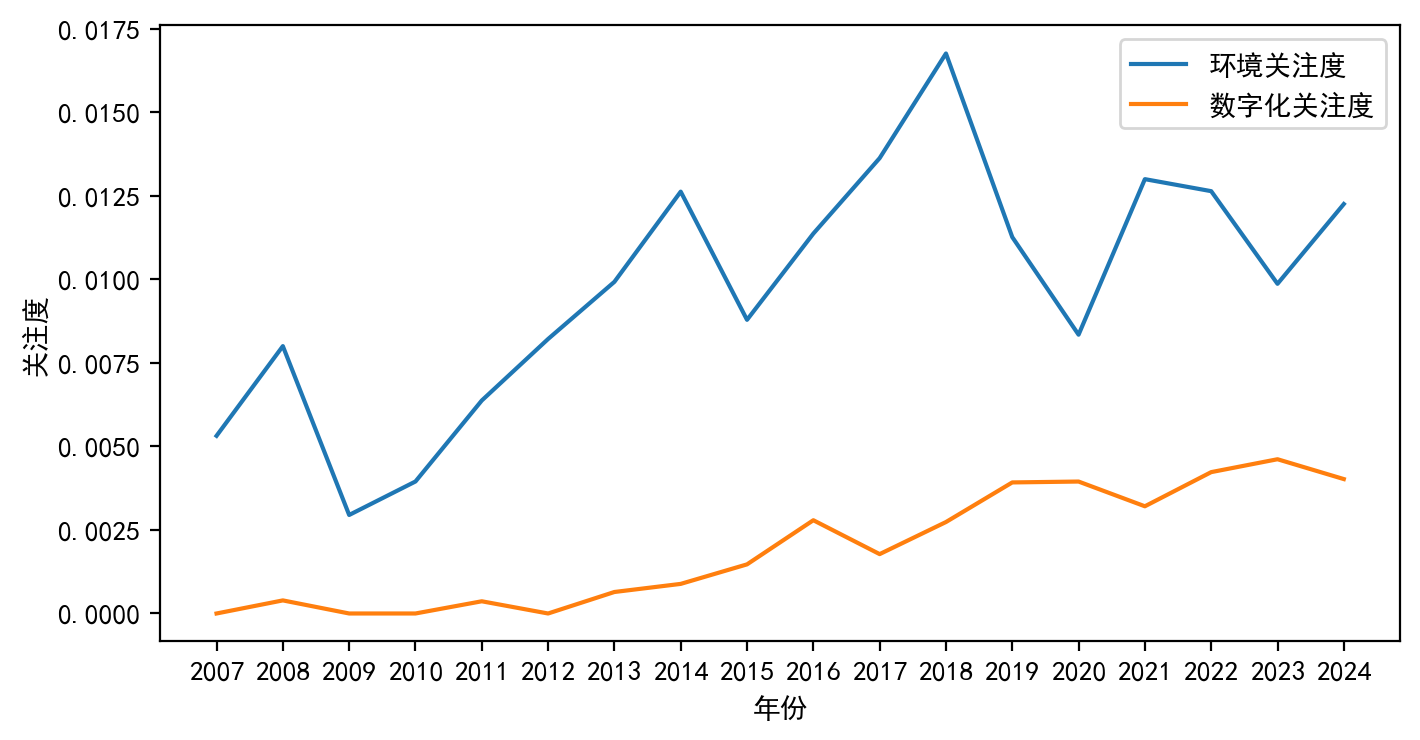

In [10]:
### 可视化
plt.figure(figsize=(8, 4), dpi=200)

sns.lineplot(data=df_new, x='year', y='green', label='环境关注度')
sns.lineplot(data=df_new, x='year', y='digital', label='数字化关注度')

plt.legend()
plt.ylabel('关注度')
plt.xlabel('年份')

plt.xticks(df_new['year'])

plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
plt.show()

In [31]:
df_econ = pd.read_excel('data/安徽省经济数据.xlsx').iloc[:-1, :]
df_econ['指标名称'] = pd.to_datetime(df_econ['指标名称'])
df_econ_filtered = df_econ[(df_econ['指标名称'] >= pd.to_datetime('2014-01-01')) & (df_econ['指标名称'] <= pd.to_datetime('2023-12-31'))]
df_econ_filtered = df_econ_filtered[df_econ_filtered['指标名称'].dt.strftime('%m-%d') == '12-31']
df_econ_filtered['指标名称'] = df_econ_filtered['指标名称'].dt.year
df_econ_filtered.columns = ['year', 'gdp_1', 'gdp_2', 'gdp_3', 'income_city', 'income_country']
for i in df_econ_filtered.index:
    year = df_econ_filtered.loc[i, 'year']
    df_econ_filtered.loc[i, 'digital'] = digital_df[digital_df['year'] == year]['total'].values[0]
df_econ_filtered

,year,gdp_1,gdp_2,gdp_3,income_city,income_country,digital
3,2023,3496.60,18871.80,24682.20,47446.0,21144.0,0.660939
7,2022,3513.70,18588.00,22943.30,45133.0,19575.0,0.942063
11,2021,3360.60,17613.20,21985.40,43009.0,18368.0,1.147579
15,2020,3184.70,15671.70,19824.20,39442.0,16620.0,1.861764
19,2019,2915.70,15337.90,18860.40,37540.0,15416.0,2.080444
23,2018,2638.00,14094.40,17278.50,34393.0,13996.0,1.598538
27,2017,2611.70,13486.60,11420.40,31640.0,12758.0,1.270325
31,2016,2567.72,11666.58,9883.57,29156.0,11720.0,0.508130
35,2015,2456.70,11342.30,8206.60,26936.0,10821.0,0.588408
39,2014,2392.40,11204.00,7252.40,24839.0,9916.0,0.886263


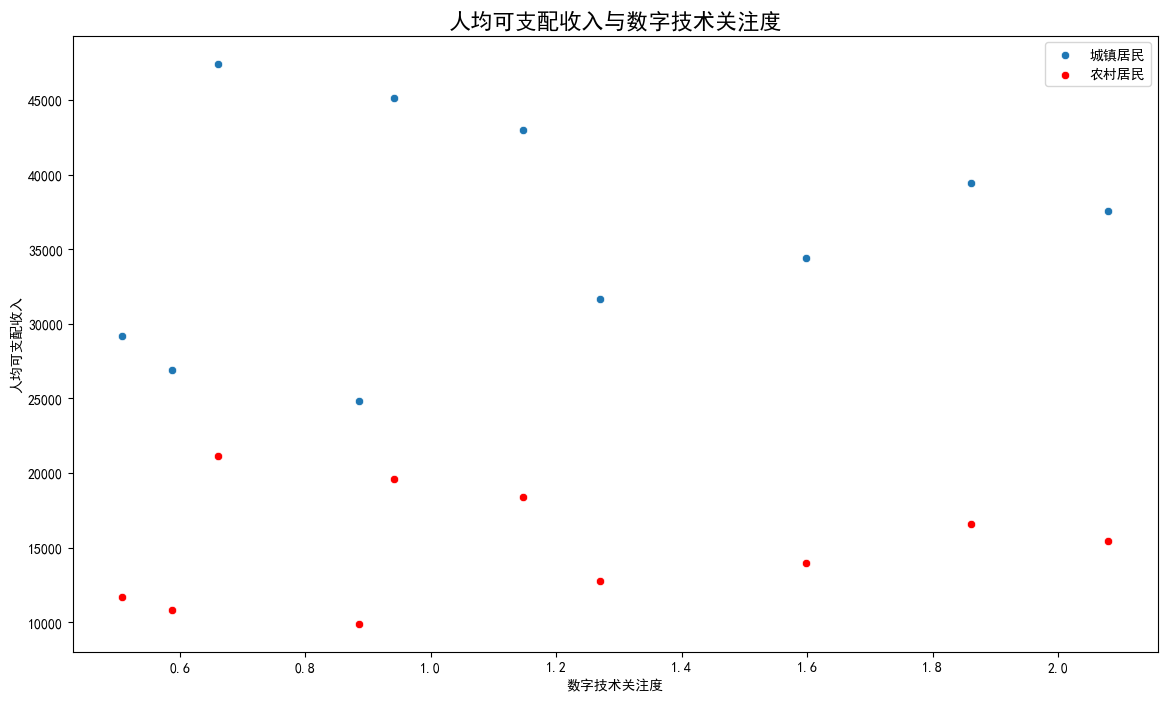

In [48]:
plt.figure(figsize=(14, 8))

sns.scatterplot(data=df_econ_filtered, x='digital', y='income_city')
sns.scatterplot(data=df_econ_filtered, x='digital', y='income_country', color='r')

plt.legend(labels=['城镇居民', '农村居民'])
plt.xlabel('数字技术关注度')
plt.ylabel('人均可支配收入')
plt.title('人均可支配收入与数字技术关注度', fontsize=16)

plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
plt.show()

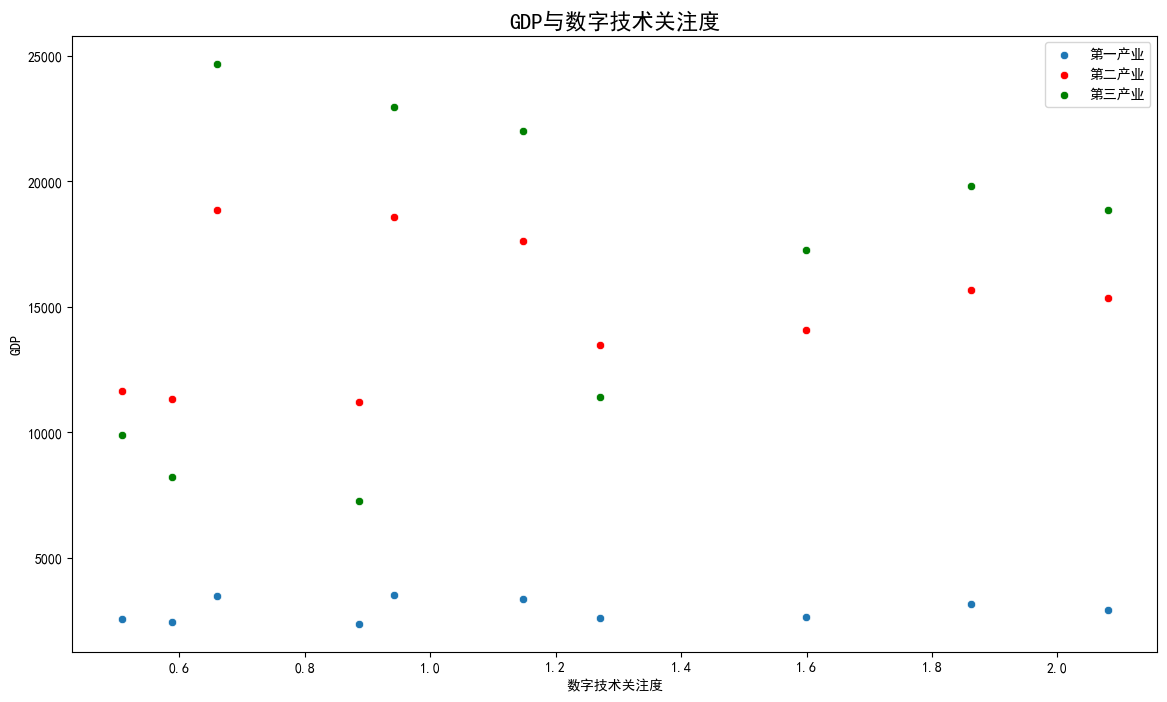

In [47]:
plt.figure(figsize=(14, 8))

sns.scatterplot(data=df_econ_filtered, x='digital', y='gdp_1')
sns.scatterplot(data=df_econ_filtered, x='digital', y='gdp_2', color='r')
sns.scatterplot(data=df_econ_filtered, x='digital', y='gdp_3', color='g')

plt.legend(labels=['第一产业', '第二产业', '第三产业'])
plt.xlabel('数字技术关注度')
plt.ylabel('GDP')
plt.title('GDP与数字技术关注度', fontsize=16)

plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
plt.show()